# Departamento de Marketing

###  -Origem dos dados: https://www.kaggle.com/arjunbhasin2013/ccdata

## Importando das bibliotecas

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [65]:
creditcard_df = pd.read_csv('Marketing_data.csv')

In [66]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [67]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Aqui podemos observar que existem alguns valores nulos em alguns atributos.

In [68]:
creditcard_df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


# Visualização e exploração dos dados

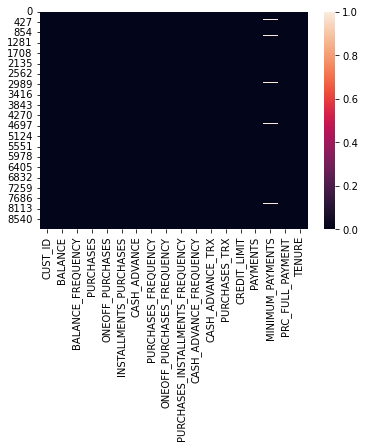

In [69]:
sns.heatmap(creditcard_df.isnull())
pass

In [70]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Com esta análise podemos ver com mais detalhes quais os atributos possuem dados faltantes, para então preenchê-los de alguma forma.

In [71]:
creditcard_df['MINIMUM_PAYMENTS'].median()

312.343947

In [72]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].median()

In [73]:
creditcard_df['CREDIT_LIMIT'].median()

3000.0

In [74]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].median()

In [75]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [76]:
creditcard_df.duplicated().sum()

0

### os valores faltantes foram preenchidos com a mediana, pois é uma medida mais razoável de ser utilizada do que a média dos valores, que pode ser fortemente influenciada por outliers. Além disso verificamos também que não há valores duplicados, que também poderia influenciar no resultado obtido ao final.

In [77]:
creditcard_df.drop('CUST_ID', axis=1, inplace = True) 
#Aqui eliminamos a coluna que possuem dados irrelevantes para o objetivo do problema.

In [78]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [79]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [80]:
len(creditcard_df.columns)

17

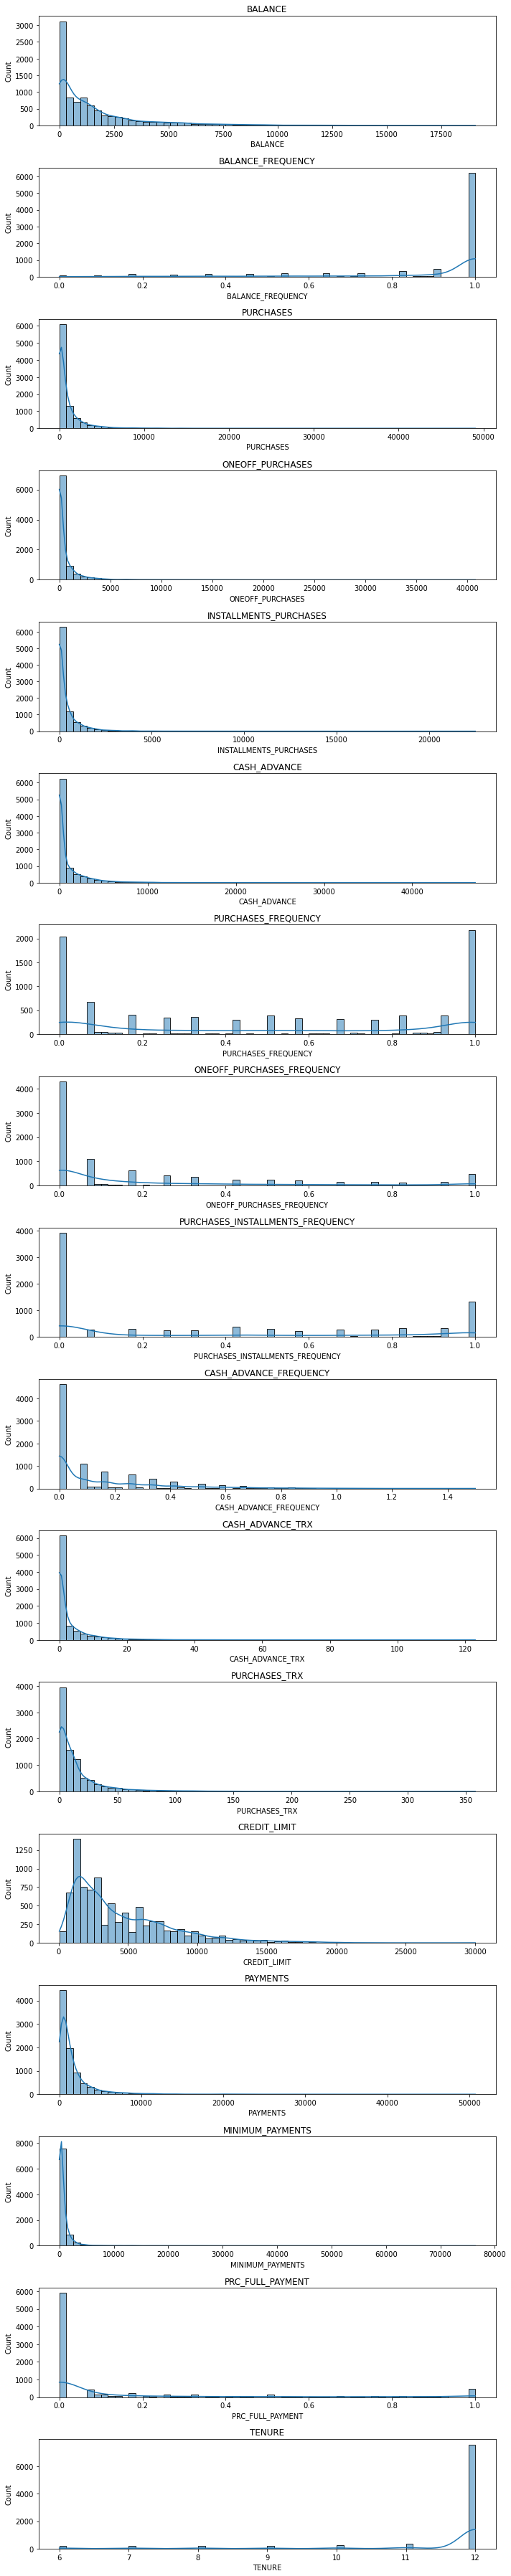

In [81]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(17, 1, i+1)
    sns.histplot(data = creditcard_df, x = creditcard_df.columns[i], kde=True, bins = 60)
    plt.title(creditcard_df.columns[i])
    
plt.tight_layout()
pass

### Acima podemos ter uma ideia geral a respeito da distribuição de valores de cada atributo.

In [82]:
correlation = creditcard_df.corr()

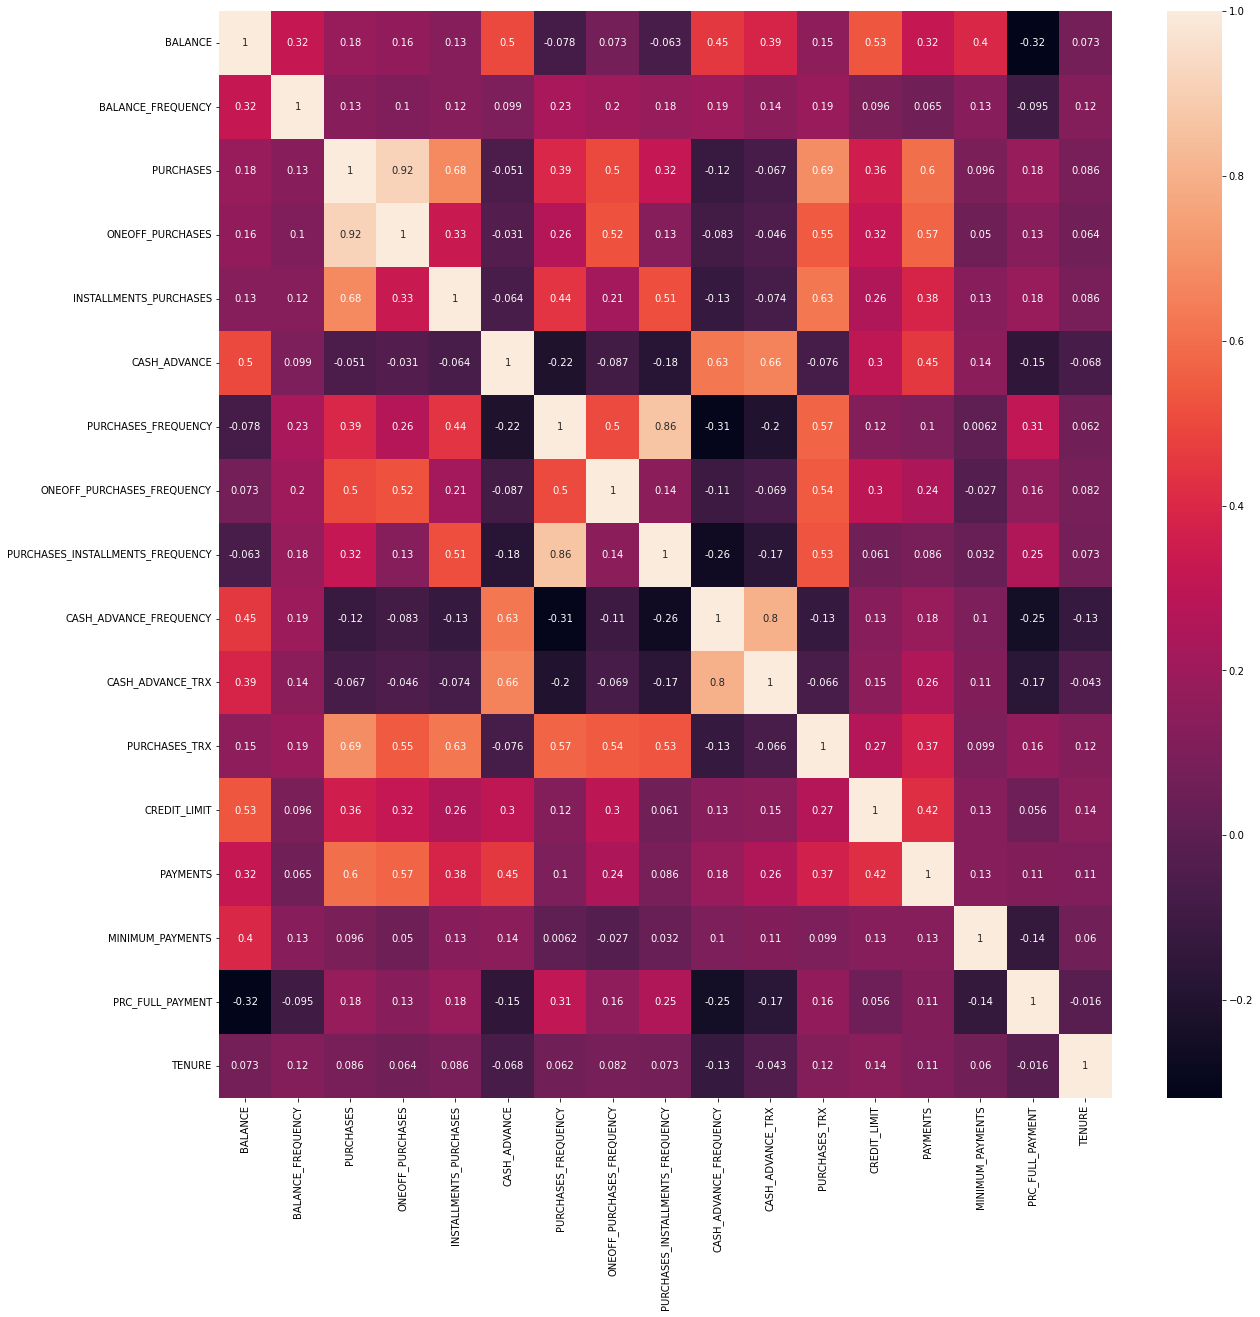

In [83]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation, annot = True)
pass

### Podemos observar fortes correlações entre alguns atributos, como **PURCHASES** e **ONEOFF_PURCHASES**, por exemplo.

# Definindo o número de clusters usando o Elbow Method

### Como iremos utilizar o método de agrupamento k-means, é importante definirmos o número ideal de grupos que iremos utilizar, para isto utilizaremos o método Elbow. Mas antes, precisamos transformar todos os dados para uma mesma escala, a fim de evitar resultados enviesados ao utilizar o k-means.

In [84]:
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

In [85]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [86]:
type(creditcard_df_scaled), type(creditcard_df)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [87]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])

(-0.9603784008150247, 0.36067954425377496)

In [88]:
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(creditcard_df_scaled)
  wcss_1.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

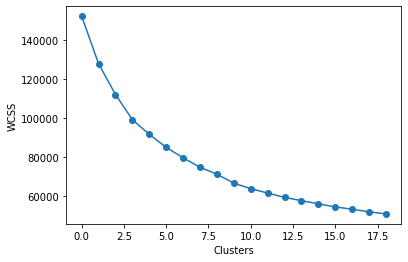

In [89]:
plt.plot(wcss_1, marker = 'o')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

### Através da análise do WCSS, podemos observar que o número de clusters igual a 8 é o suficiente.

# Agrupamento com K-means 

In [90]:
kmeans = KMeans(n_clusters = 8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [91]:
np.unique(labels, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([ 867, 2724,  423, 1182, 2004, 1098,   30,  622], dtype=int64))

In [92]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers = scaler.inverse_transform(cluster_centers)

In [93]:
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,5081.959655,0.971113,535.471096,331.097001,204.491361,5209.210371,0.298222,0.138342,0.199620,0.519769,16.468281,8.058824,8227.456223,4072.602517,2154.455235,0.038137,11.611303
1,1596.742344,0.972988,231.173065,182.156531,49.198209,788.568781,0.143945,0.080205,0.064473,0.156962,3.076725,2.631424,3381.430494,1010.543438,829.626678,0.020092,11.882893
2,3441.530986,0.987896,5855.151608,3508.591111,2347.978936,568.874079,0.955365,0.674962,0.851760,0.072674,1.801418,83.846336,9002.245863,5468.421612,1890.855670,0.242857,11.964539
3,105.494632,0.369494,338.310626,200.913113,137.648613,308.067290,0.266937,0.069661,0.189780,0.030936,0.681895,4.276650,3858.578210,1176.975090,181.560334,0.236510,11.784264
4,804.238422,0.956175,925.132640,186.928089,738.650299,213.448479,0.889986,0.086799,0.845990,0.039868,0.779441,19.423154,3538.133833,1105.901315,786.721837,0.246856,11.861277
5,1228.829033,0.970094,1972.510118,1577.141330,395.368789,282.550045,0.868108,0.761566,0.400032,0.053875,1.050091,27.744080,5867.738864,1986.435913,479.530308,0.271819,11.866120
6,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
7,865.015978,0.795051,385.181720,233.977974,151.686061,1122.064941,0.408846,0.116344,0.275196,0.196911,3.255627,5.062701,2428.488746,596.373827,341.313370,0.157813,7.229904


## Dividindo os dados em 7 grupos, podemos observar a localização do centro de cada grupo definido pelo k-menas, com isto podemos imaginar maneiras de tratar alguns deles, como por exemplo:

### - Grupo 1: usam o cartão de crédito como "empréstimo" (setor mais lucrativo para o banco), possuem muito dinheiro na conta corrente (5021) e sacam muito dinheiro do cartão de crédito (5149), compram pouco (0.29) e usam bastante o limite do cartão para saques (0.51). Pagam muito pouco a fatura completa (0.03);

### - Grupo 3 (VIP/Prime): limite do cartão alto (16043) e o mais alto percentual de pagamento da fatura completa (0.51). Aumentar o limite do cartão e o hábito de compras seriam boas formas de se lidar com este grupo;

### - Grupo 6: Clientes que pagam poucos juros para o banco e são cuidadosos com seu dinheiro. Possui menos dinheiro na conta corrente (105) e não sacam muito dinheiro do limite do cartão (307). 23% de pagamento da fatura completa do cartão de crédito;

### - Grupo 7 (clientes novos): clientes mais novos (menor tempo de uso do cartão, 7.23 anos) e que mantém pouco dinheiro na conta corrente (869 unidades).

In [94]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'CLUSTER': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


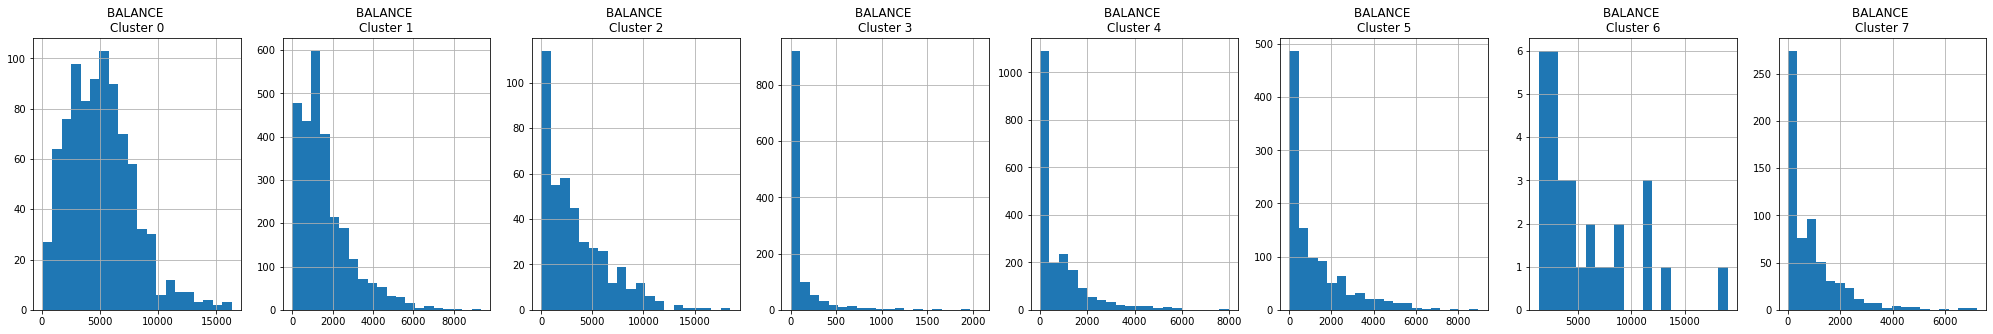

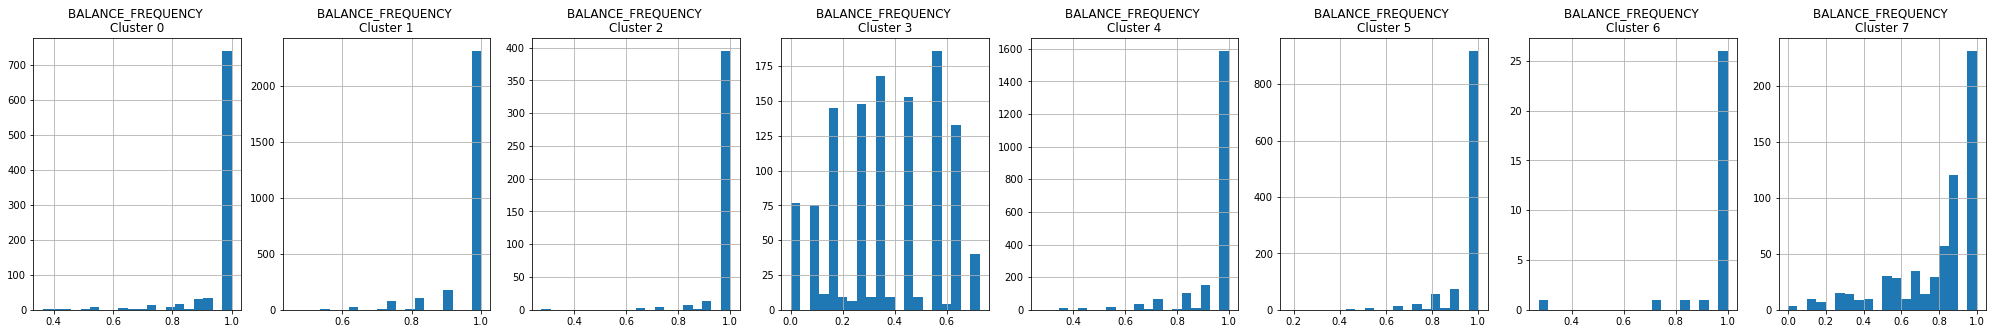

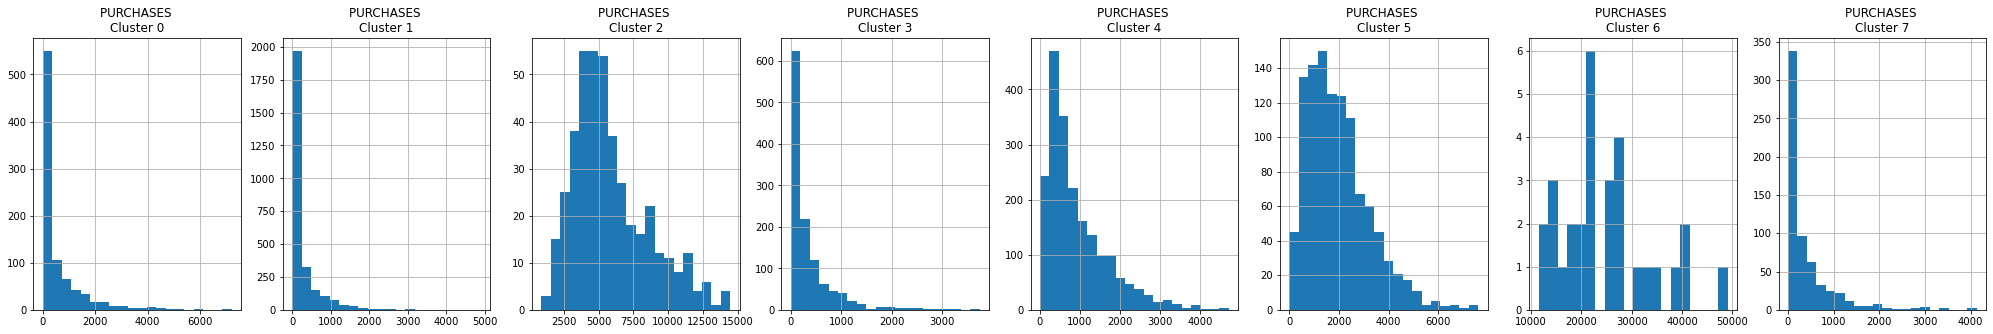

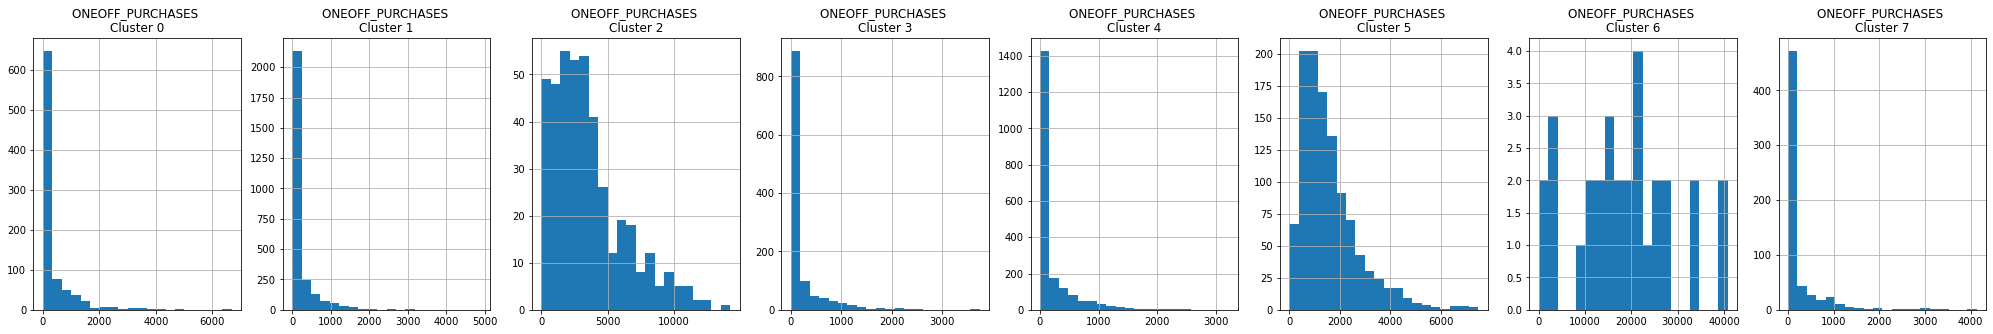

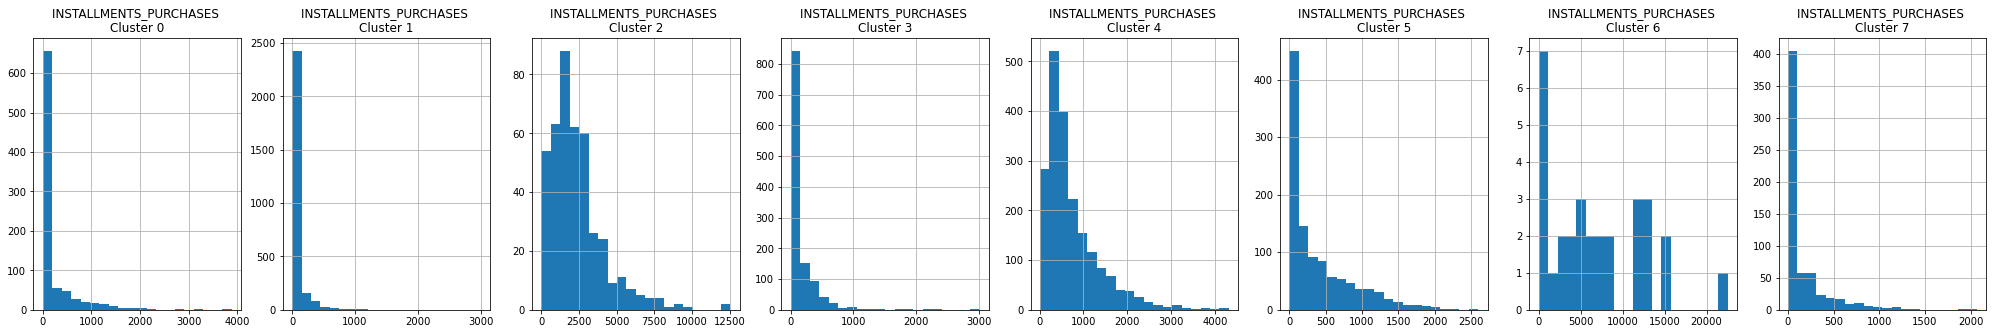

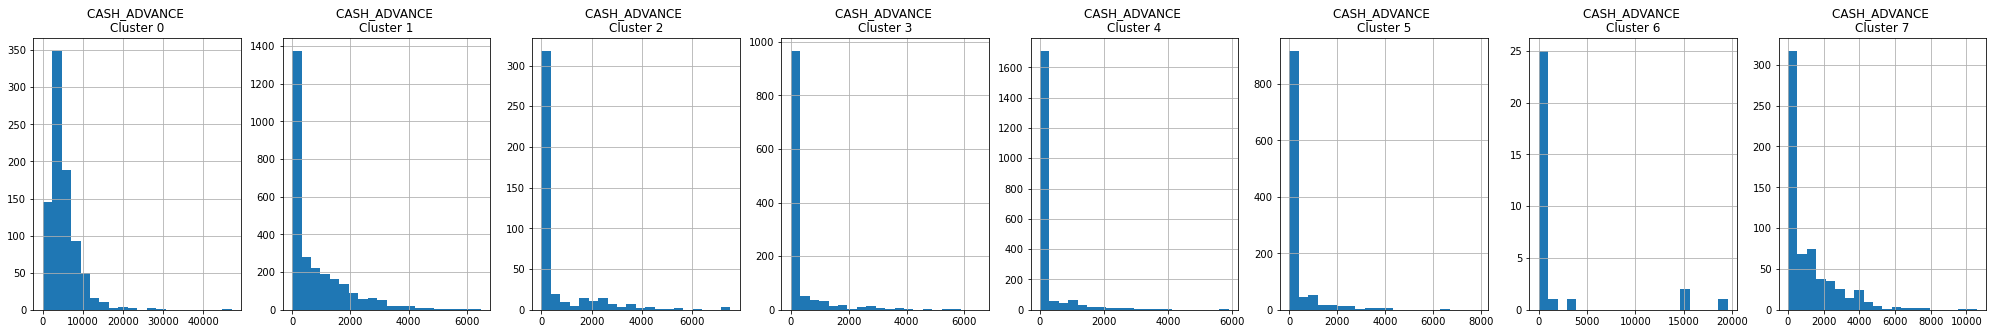

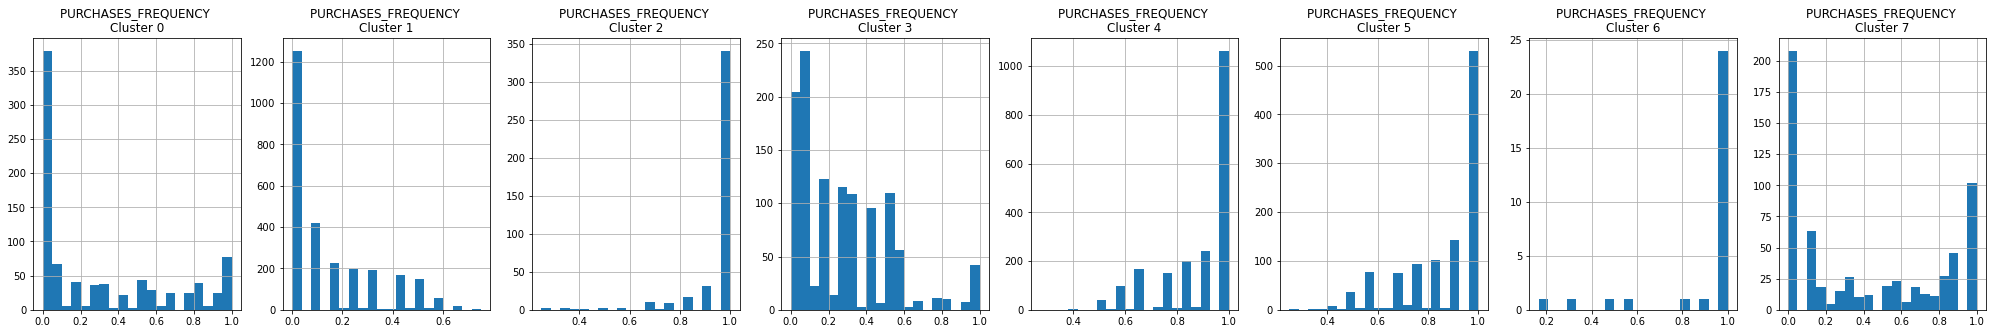

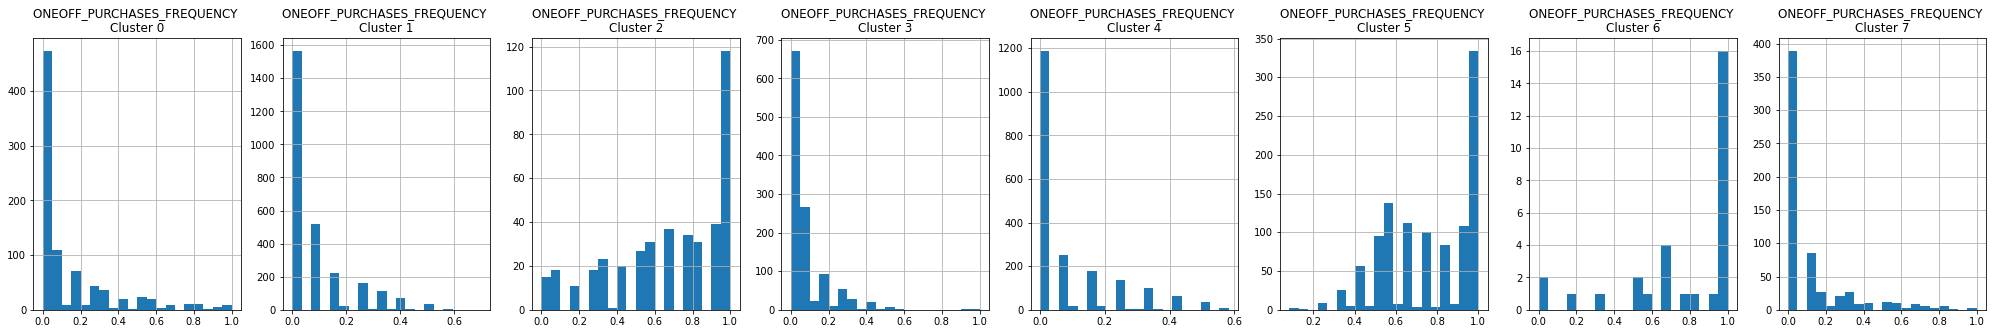

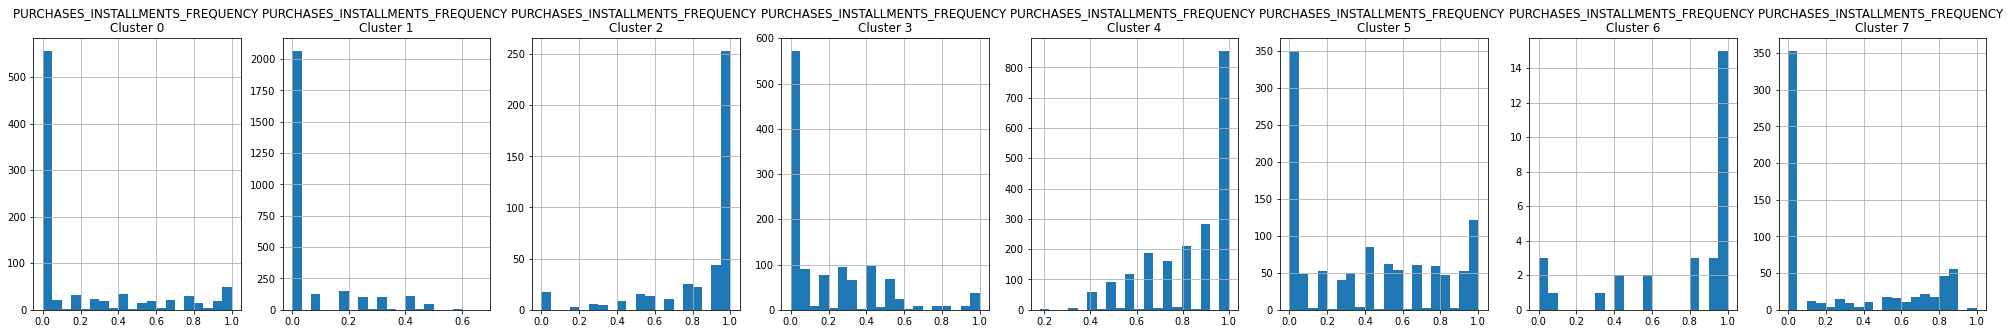

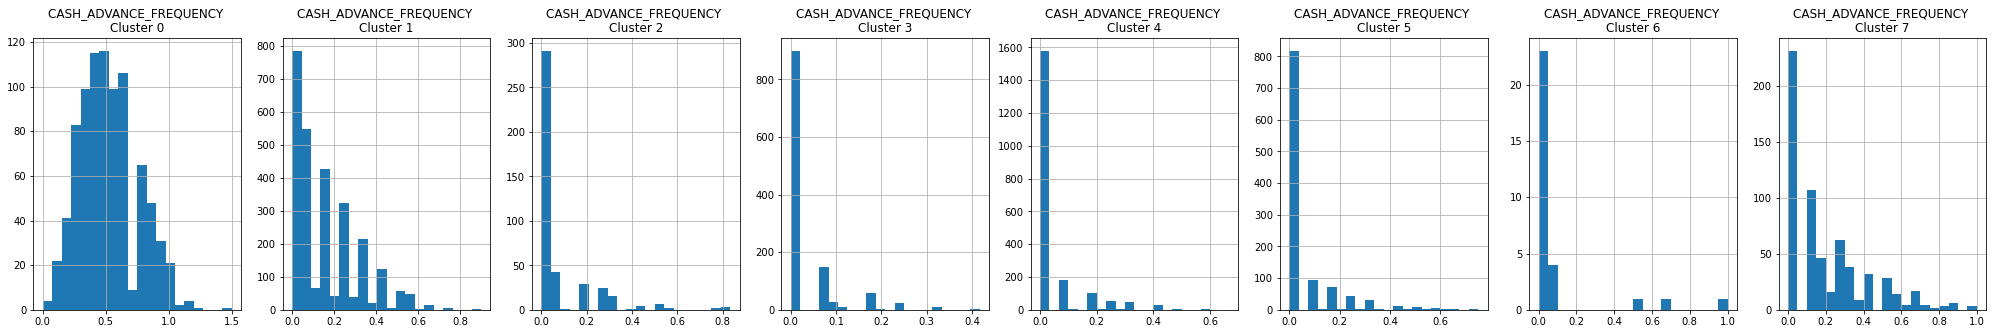

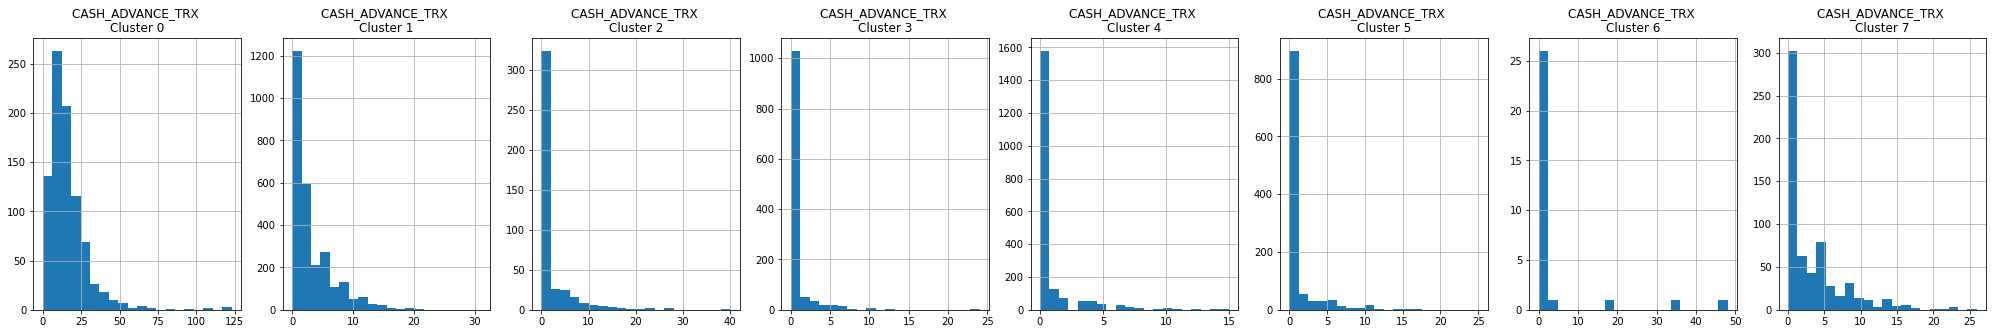

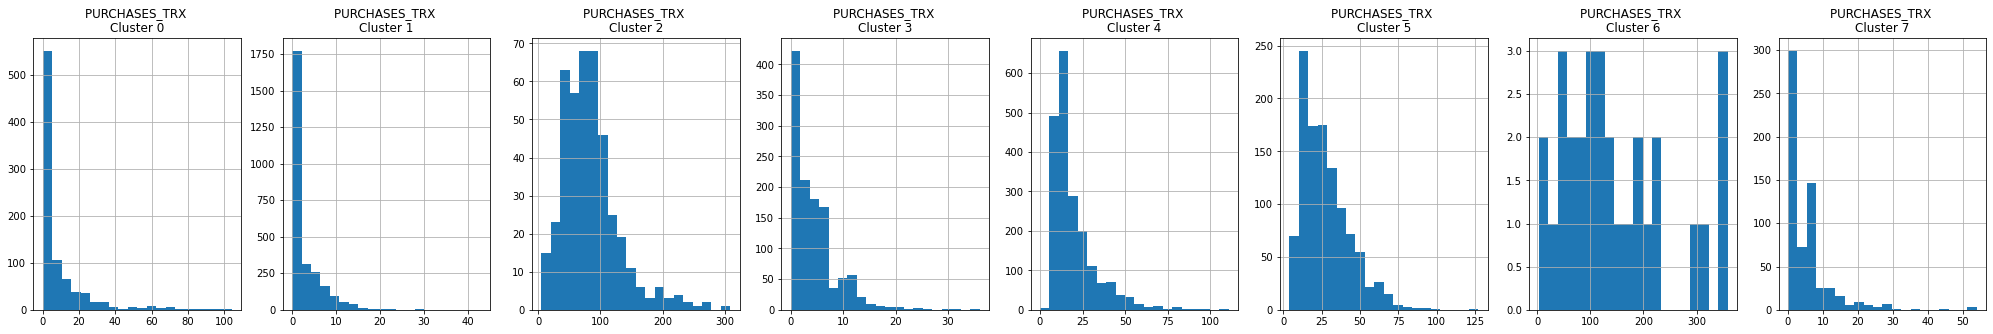

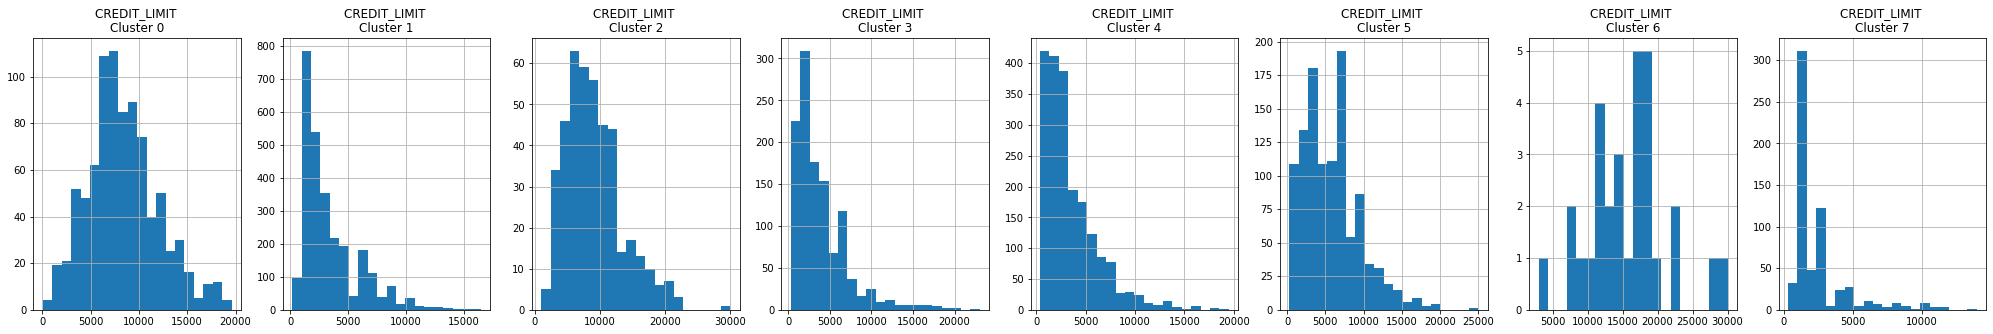

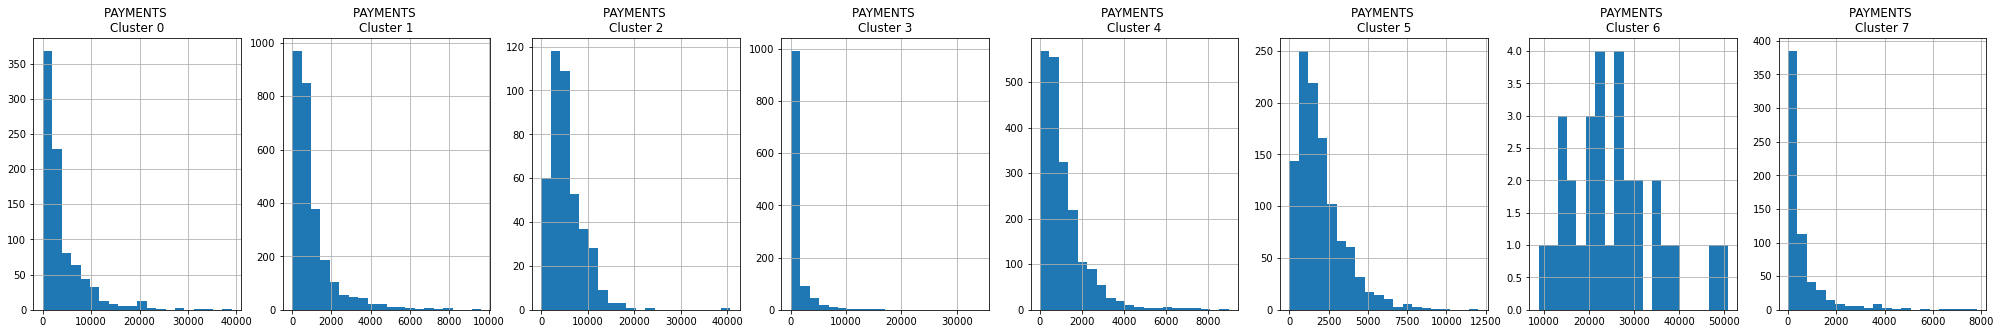

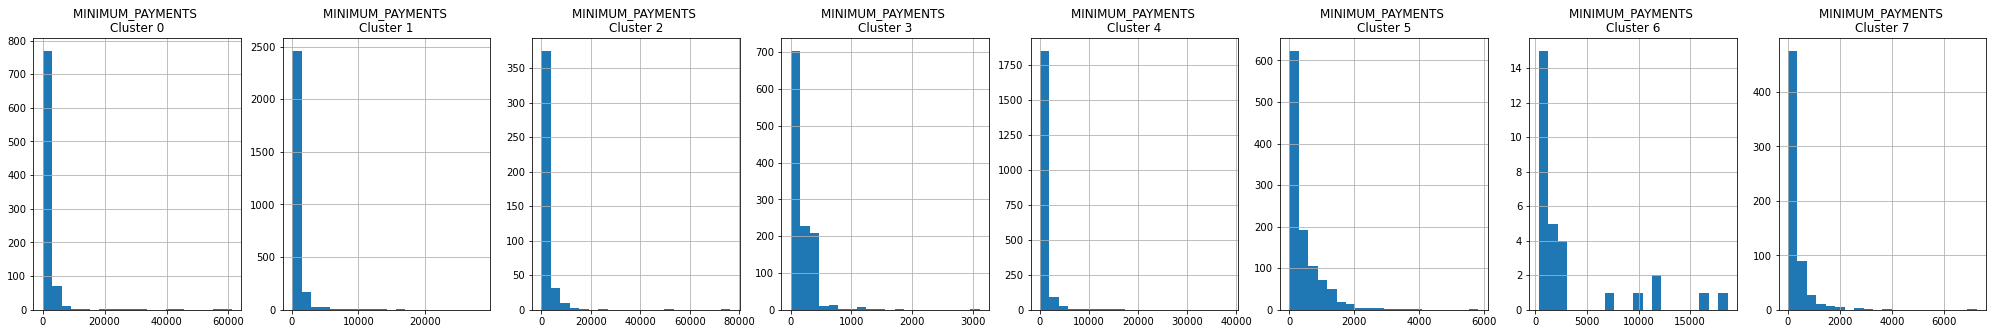

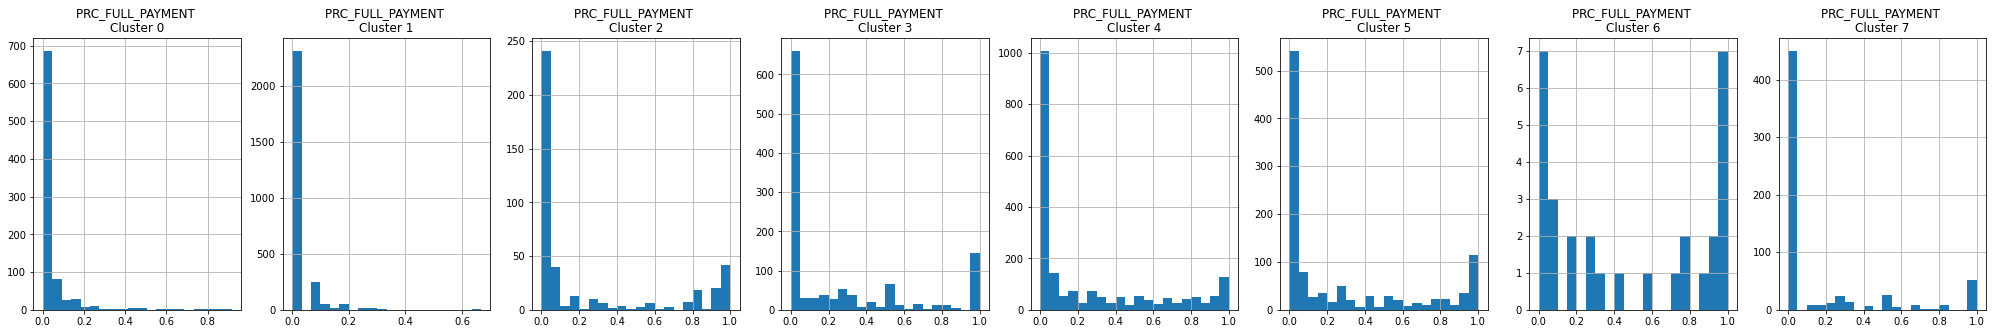

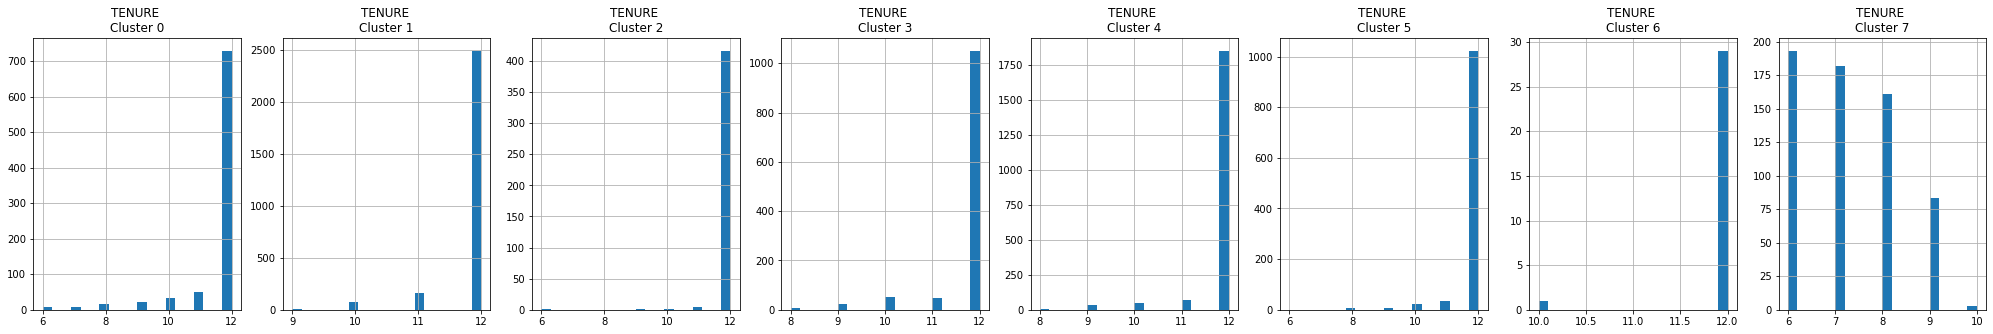

In [95]:
for i in creditcard_df.columns:
    plt.figure(figsize=(35,5))
    for j in range(8):
        plt.subplot(1,8,j+1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['CLUSTER'] == j]
        cluster[i].hist(bins = 20)
        plt.title(f'{i} \nCluster {j}')
    plt.show()
pass

### Acima podemos ver as diferenças entre as distribuições de cada grupo para cada atributo do conjunto de dados.

In [96]:
credit_ordered = creditcard_df_cluster.sort_values(by = 'CLUSTER')
credit_ordered.reset_index(inplace = True)

In [97]:
credit_ordered.head()

,index,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,554,1758.979585,0.818182,1199.00,1199.0,0.00,8552.910316,0.090909,0.090909,0.000000,0.636364,17,1,6750.0,11634.387130,422.041626,0.111111,11,0
1,7040,3120.738718,1.000000,0.00,0.0,0.00,6125.592369,0.000000,0.000000,0.000000,0.416667,12,0,4800.0,3040.970740,940.054425,0.200000,12,0
2,1315,3007.093879,1.000000,0.00,0.0,0.00,2374.346946,0.000000,0.000000,0.000000,0.750000,31,0,3500.0,878.602529,734.586110,0.000000,12,0
3,2271,2139.919711,1.000000,330.89,71.4,259.49,2649.967098,0.500000,0.083333,0.416667,0.416667,18,7,6000.0,703.005516,720.646441,0.000000,12,0
4,7027,2705.026656,1.000000,0.00,0.0,0.00,5760.383488,0.000000,0.000000,0.000000,0.416667,9,0,6500.0,1266.356400,743.493119,0.000000,12,0


In [98]:
credit_ordered.to_csv('clusters.csv')

# Aplicação de PCA (principal component analysis) e visualização dos resultados

### A ideia aqui é visualizarmos melhor a distribuição dos grupos. Com várias dimensões é impossível gerarmos uma figura, então a estratégia é reduzirmos através do PCA para que possa ser gerado um gráfico.

In [99]:
pca = PCA(n_components = 2)
principal_com = pca.fit_transform(creditcard_df_scaled)

In [100]:
pca_df = pd.DataFrame(data = principal_com, columns = ['PCA 1', 'PCA 2'])
pca_df.head()

,PCA 1,PCA 2
0,-1.683649,-1.072242
1,-1.134085,2.509152
2,0.969396,-0.383578
3,-0.888220,0.004649
4,-1.600021,-0.683796


In [101]:
pca_df = pd.concat([pca_df, pd.DataFrame({'CLUSTER': labels})], axis = 1)
pca_df.head()

,PCA 1,PCA 2,CLUSTER
0,-1.683649,-1.072242,1
1,-1.134085,2.509152,0
2,0.969396,-0.383578,5
3,-0.888220,0.004649,1
4,-1.600021,-0.683796,1


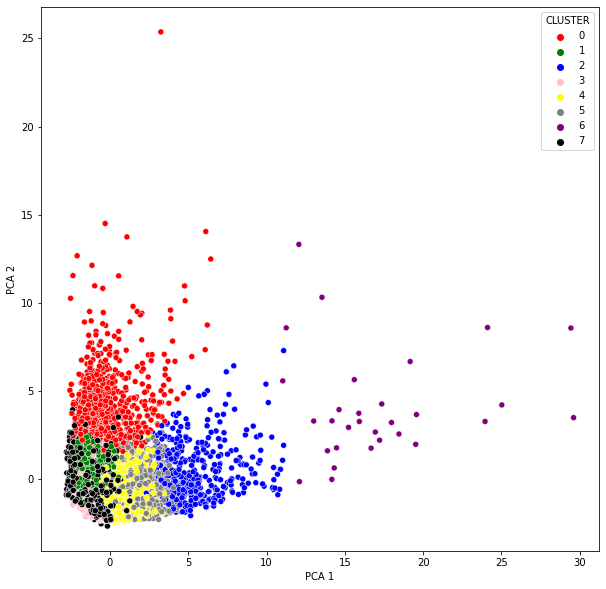

In [102]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'PCA 1', y = 'PCA 2', hue = 'CLUSTER', 
                data = pca_df, palette = ['red','green','blue','pink','yellow','gray','purple','black'])
pass

# Aplicação de Autoencoders

### Autoencoders é um tipo de rede neural artificial utilizada para codificar dados, utilizando a mesma entrada e saida para serem comparadas. A ideia é reduzir o número de atributos (através da correlação entre eles), codificando-os de tal forma que, ao decodificá-los, obtemos os dados o mais próximo possível dos originais.

In [103]:
creditcard_df_scaled.shape

(8950, 17)

In [104]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [105]:
input_df = Input(shape=(17,))
x = Dense(500, activation = 'relu')(input_df)
x = Dense(2000, activation = 'relu')(x)

encoded = Dense(10, activation = 'relu')(x)

x = Dense(2000, activation = 'relu')(encoded)
x = Dense(500, activation = 'relu')(x)

decoded = Dense(17)(x)

In [106]:
autoencoder = Model(input_df, decoded)

In [107]:
encoder = Model(input_df, encoded)

In [108]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [109]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 50, verbose = 0)

In [110]:
creditcard_df_scaled.shape

(8950, 17)

In [111]:
compact = encoder.predict(creditcard_df_scaled)

280/280 [==============================] - 2s 7ms/step


In [112]:
compact.shape

(8950, 10)

In [113]:
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

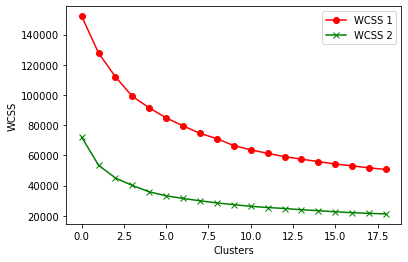

In [114]:
plt.plot(wcss_1, marker = 'o', color = 'r', label = 'WCSS 1')
plt.plot(wcss_2, marker = 'x', color = 'g', label = 'WCSS 2')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.legend()
pass

In [115]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

KMeans(n_clusters=4)

In [116]:
labels = kmeans.labels_
labels.shape

(8950,)

In [117]:
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'CLUSTER': labels})], axis = 1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [118]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['PCA1', 'PCA2'])
pca_df.head()

,PCA1,PCA2
0,-1.342060,-0.344299
1,0.965408,1.258171
2,-0.956184,0.109641
3,-0.305736,-0.218762
4,-1.396282,-0.121267


In [119]:
pca_df = pd.concat([pca_df,pd.DataFrame({'CLUSTER': labels})], axis = 1)
pca_df.head()

,PCA1,PCA2,CLUSTER
0,-1.342060,-0.344299,0
1,0.965408,1.258171,2
2,-0.956184,0.109641,0
3,-0.305736,-0.218762,0
4,-1.396282,-0.121267,0


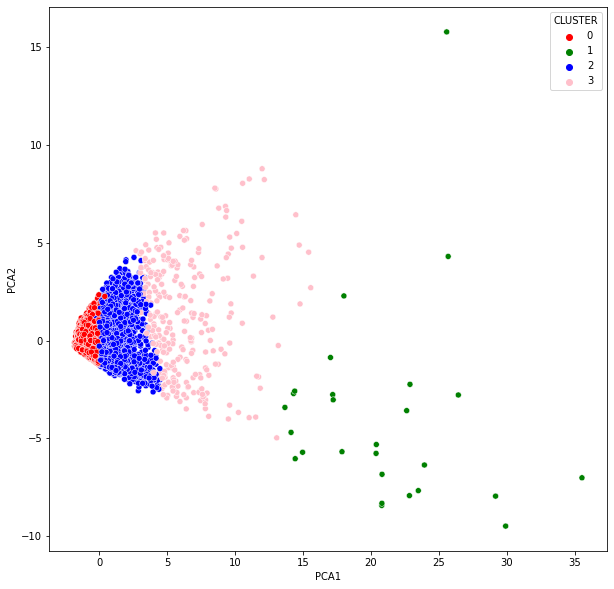

In [120]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'CLUSTER', 
                data = pca_df, palette = ['red','green','blue','pink'])
pass

### Podemos observar que ao utilizar o Autoencoder conseguimos uma distribuição muito melhor de grupos para o conjunto de dados.

In [121]:
df_cluster_ordered = df_cluster_at.sort_values(by = 'CLUSTER')

In [122]:
df_cluster_ordered.to_csv('cluster_ordereded.xls')